<a href="https://colab.research.google.com/github/saykim/ds/blob/main/cnn_tutorial_max_average_global_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras import datasets, layers, models

170508288/170498071 [==============================] - 13s 0us/step


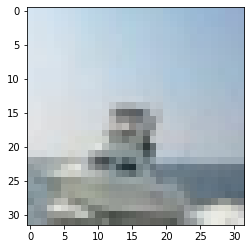

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# 32x32x3 (RGB) 0~255

#Normalizaton
train_images, test_images = train_images/255.0, test_images/255.0

plt.imshow(train_images[100])
 

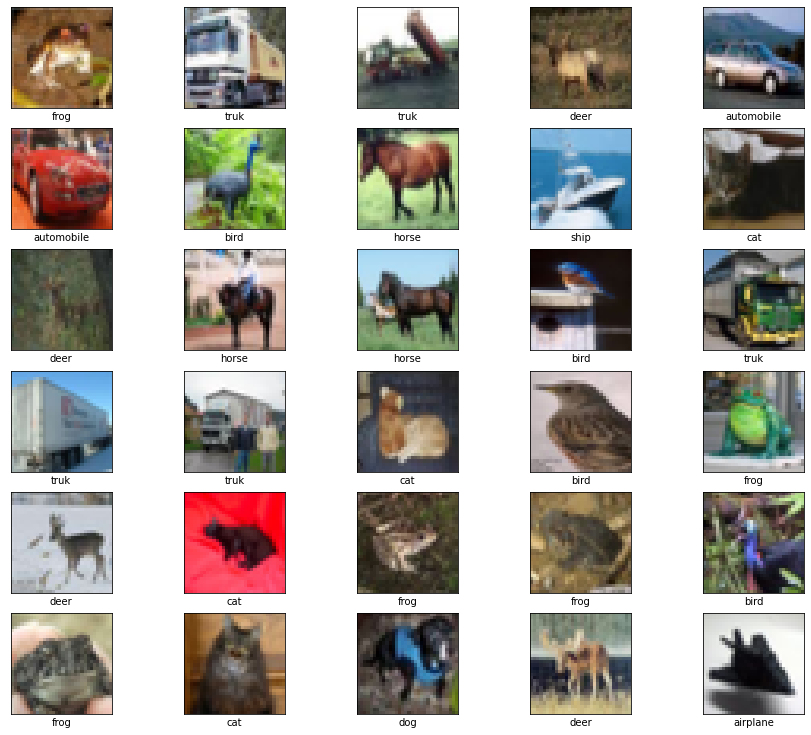

In [3]:
class_names = ['airplane', 'automobile','bird','cat','deer', 'dog','frog','horse','ship','truk']


plt.figure(figsize=(15,13))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]], fontdict={'color':'black'})
plt.show()

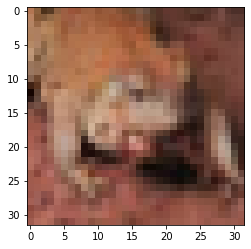

In [4]:
plt.imshow(test_images[5])

In [19]:
#Max pulling 사용

inputs = keras.Input(shape=(32,32,3))

x = keras.layers.Conv2D(filters=32, 
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           activation = 'relu')(inputs)

x = keras.layers.MaxPooling2D(pool_size=(2,2),
                              strides = (2,2),
                              padding='valid')(x)

x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Conv2D(filters=64, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='valid',
                           activation='relu')(x)

x = keras.layers.Conv2D(filters=128, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='valid',
                           activation='relu')(x)                        
                          
x = keras.layers.Conv2D(filters=256, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='same',
                           activation='relu')(x)                                                           

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(256, activation='relu')(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)

model_by_func = keras.Model(inputs=inputs, outputs=outputs, name='model_by_func')

In [20]:
model_by_func.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_by_func.summary()

Model: "model_by_func"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 128)       73856     
                                                     

In [21]:
history = model_by_func.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 14s 8ms/step - loss: 1.5198 - accuracy: 0.4476 - val_loss: 1.1910 - val_accuracy: 0.5699
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.1014 - accuracy: 0.6105 - val_loss: 1.0144 - val_accuracy: 0.6387
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9145 - accuracy: 0.6750 - val_loss: 0.9114 - val_accuracy: 0.6763
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: 0.7733 - accuracy: 0.7269 - val_loss: 0.9199 - val_accuracy: 0.6813
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6582 - accuracy: 0.7653 - val_loss: 0.9055 - val_accuracy: 0.6893
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.5439 - accuracy: 0.8058 - val_loss: 0.9420 - val_accuracy: 0.7074
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4439 - accuracy: 0.8427 - val_loss: 0.9223 - val_accuracy: 0.

313/313 - 1s - loss: 2.1398 - accuracy: 0.6844 - 994ms/epoch - 3ms/step


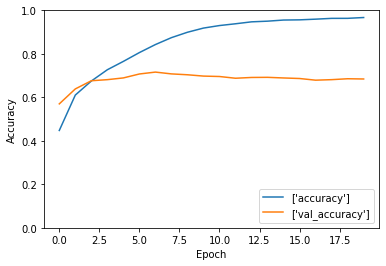

In [22]:
plt.plot(history.history['accuracy'], label=['accuracy'])
plt.plot(history.history['val_accuracy'], label=['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')



# test_loss, test_acc, test_mse =model_by_func.evaluate(test_images, test_labels, verbose=2)

test_loss, test_acc =model_by_func.evaluate(test_images, test_labels, verbose=2)


In [ ]:
test_loss, test_acc, test_mse =model_by_func.evaluate(test_images, test_labels, verbose=2)

In [ ]:
class ModelByClass(tf.keras.Model):
    def __init__(self):
        super(ModelByClass, self).__init__()
        self.conv2D_1 = tf.keras.layers.Conv2D(
          filters = 32,
          kernel_size = (3,3),
        #   strides = (1,1),
          padding = 'valid',
          activation = 'relu'
        )
        self.conv2D_2 = tf.keras.layers.Conv2D(
          filters = 64,
          kernel_size = (3,3),
          strides = (1,1),
          padding = 'valid',
          activation = 'relu'
        )
        self.conv2D_3 = tf.keras.layers.Conv2D(
          filters = 64,
          kernel_size = (3,3),
          strides = (1,1),
          padding = 'valid',
          activation = 'relu'
        )
        self.conv2D_4 = tf.keras.layers.Conv2D(
          filters = 32,
          kernel_size = (3,3),
          strides = (1,1),
          padding = 'valid',
          activation = 'relu'
        )

        self.flatten = tf.keras.layers.Flatten()
        self.dense_1 = tf.keras.layers.Dense(32, activation = 'relu')
        self.dense_2 = tf.keras.layers.Dense(10, activation = tf.nn.softmax)

    def call(self, inputs):
        x = self.conv2D_1(inputs)
        x = self.conv2D_2(x)
        x = self.conv2D_3(x)
        # x = self.conv2D_4(x)
        x = self.flatten(x)
        # x = self.dense_1(x)
        return self.dense_2(x)

model_by_class = ModelByClass()
model_by_class.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy', 'mse'])

In [ ]:
history = model_by_class.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels) )

In [ ]:
plt.plot(history.history['accuracy'], label=['accuracy'])
plt.plot(history.history['val_accuracy'], label=['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')


test_loss, test_acc, test_mse =model_by_func.evaluate(test_images, test_labels, verbose=2)

## Using Sequential

In [ ]:
from warnings import filters
model_by_seq = models.Sequential()
model_by_seq.add(layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu',input_shape=(32,32,3)))
model_by_seq.add(layers.Conv2D(filters = 64, kernel_size=(5,5), strides=(2,2),activation = 'relu'))
model_by_seq.add(layers.Flatten())
model_by_seq.add(layers.Dense(10, activation=tf.nn.softmax))

model_by_seq.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_by_seq.summary()

In [ ]:
history = model_by_seq.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels) )

In [ ]:
plt.plot(history.history['accuracy'], label=['accuracy'])
plt.plot(history.history['val_accuracy'], label=['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')


test_loss, test_acc, test_mse =model_by_func.evaluate(test_images, test_labels, verbose=2)

## Average Polling

In [23]:
#Max pulling 사용

inputs = keras.Input(shape=(32,32,3))

x = keras.layers.Conv2D(filters=32, 
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='valid',
                           activation = 'relu')(inputs)

x = keras.layers.AveragePooling2D(pool_size=(2,2),
                              strides = (2,2),
                              padding='valid')(x)

x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Conv2D(filters=64, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='valid',
                           activation='relu')(x)

x = keras.layers.Conv2D(filters=128, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='valid',
                           activation='relu')(x)
                           
x = keras.layers.AveragePooling2D(pool_size=(2,2),
                              strides = (2,2),
                              padding='valid')(x)                                                   
                          
x = keras.layers.Conv2D(filters=256, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='same',
                           activation='relu')(x)                                                           

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(256, activation='relu')(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)

model_by_func = keras.Model(inputs=inputs, outputs=outputs, name='model_by_func')


model_by_func.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_by_func.summary()

Model: "model_by_func"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 average_pooling2d (AverageP  (None, 15, 15, 32)       0         
 ooling2D)                                                       
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_24 (Conv2D)          (None, 11, 11, 128)       73856     
                                                     

In [24]:
history = model_by_func.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 9s 5ms/step - loss: 1.5178 - accuracy: 0.4452 - val_loss: 1.2655 - val_accuracy: 0.5507
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1377 - accuracy: 0.5949 - val_loss: 1.0409 - val_accuracy: 0.6312
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9468 - accuracy: 0.6652 - val_loss: 0.9346 - val_accuracy: 0.6722
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8067 - accuracy: 0.7173 - val_loss: 0.9022 - val_accuracy: 0.6948
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6896 - accuracy: 0.7566 - val_loss: 0.8978 - val_accuracy: 0.6964
Epoch 6/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5728 - accuracy: 0.7962 - val_loss: 0.8753 - val_accuracy: 0.7148
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4668 - accuracy: 0.8347 - val_loss: 0.9699 - val_accuracy: 0.6980
Epo

313/313 - 1s - loss: 1.8687 - accuracy: 0.6900 - 867ms/epoch - 3ms/step


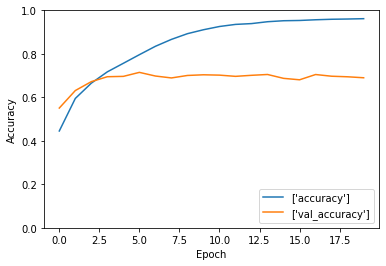

In [26]:
plt.plot(history.history['accuracy'], label=['accuracy'])
plt.plot(history.history['val_accuracy'], label=['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')



# test_loss, test_acc, test_mse =model_by_func.evaluate(test_images, test_labels, verbose=2)

test_loss, test_acc =model_by_func.evaluate(test_images, test_labels, verbose=2)


## Gloval Average Polling


In [28]:
#Max pulling 사용

inputs = keras.Input(shape=(32,32,3))

x = keras.layers.Conv2D(filters=32, 
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='valid',
                           activation = 'relu')(inputs)

x = keras.layers.MaxPool2D(pool_size=(2,2),
                              strides = (2,2),
                              padding='valid')(x)   

x = keras.layers.Dropout(0.2)(x)

x = keras.layers.Conv2D(filters=64, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='valid',
                           activation='relu')(x)

x = keras.layers.Conv2D(filters=128, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='valid',
                           activation='relu')(x)
                           
x = keras.layers.Conv2D(filters=256, 
                           kernel_size=(3,3),
                           strides=(1,1), 
                           padding='same',
                           activation='relu')(x)                                                           

x = keras.layers.GlobalAveragePooling2D()(x)  #GlobalAveragePooling2D      

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(256, activation='relu')(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)

model_by_func = keras.Model(inputs=inputs, outputs=outputs, name='model_by_func')


model_by_func.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_by_func.summary()

Model: "model_by_func"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_30 (Conv2D)          (None, 11, 11, 128)       73856     
                                                     

In [29]:
history = model_by_func.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 11s 6ms/step - loss: 1.6850 - accuracy: 0.3533 - val_loss: 1.3848 - val_accuracy: 0.4840
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2840 - accuracy: 0.5322 - val_loss: 1.1865 - val_accuracy: 0.5698
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0782 - accuracy: 0.6168 - val_loss: 1.0232 - val_accuracy: 0.6442
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9506 - accuracy: 0.6622 - val_loss: 0.8771 - val_accuracy: 0.6905
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8523 - accuracy: 0.7003 - val_loss: 0.8450 - val_accuracy: 0.6989
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7739 - accuracy: 0.7287 - val_loss: 0.7967 - val_accuracy: 0.7205
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7133 - accuracy: 0.7495 - val_loss: 0.7503 - val_accuracy: 0.73

313/313 - 1s - loss: 0.6808 - accuracy: 0.7966 - 1s/epoch - 4ms/step


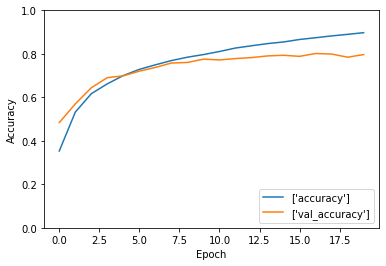

In [30]:
plt.plot(history.history['accuracy'], label=['accuracy'])
plt.plot(history.history['val_accuracy'], label=['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')



# test_loss, test_acc, test_mse =model_by_func.evaluate(test_images, test_labels, verbose=2)

test_loss, test_acc =model_by_func.evaluate(test_images, test_labels, verbose=2)